In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [4]:
df.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [5]:
#to convert object type column(Month) into DateTime on the load time of dataset use inbuilt parameter of read_csv()
#parse_dates=['column_name']
df['DATE']=pd.to_datetime(df['DATE'])
df.dtypes

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [6]:
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


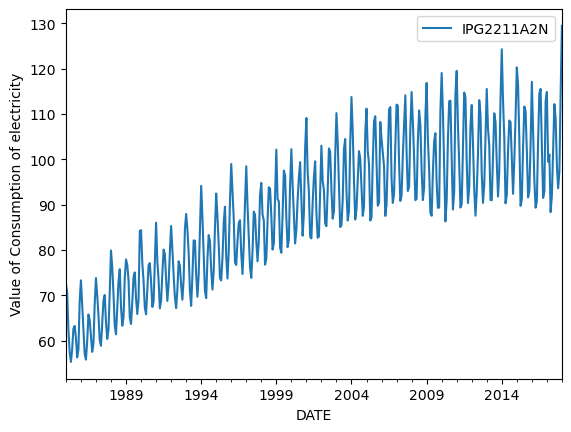

In [7]:
#set the date as index
#visulaize time series data
df.plot(x='DATE',y='IPG2211A2N')
plt.xlabel('DATE')
plt.ylabel("Value of Consumption of electricity")
plt.show()

In [8]:
#in a given time series we can see it is non-stationary,trend occur which is upward trend(more consumption of electricity),seasonality is also present
#to see thar , it has trend as well as it has seasonality
'''Now it has trend that means it does not have a constant mean and it has 
seasonality so there are 2 factors which has    this data is non-stationary.
so if this data is non-stationary we need to do something about it and what will
need to do we need to perform differencing '''

'Now it has trend that means it does not have a constant mean and it has \nseasonality so there are 2 factors which has    this data is non-stationary.\nso if this data is non-stationary we need to do something about it and what will\nneed to do we need to perform differencing '

In [9]:
#so now applying differencing(I) to make the series stationary
#first differencing:use shift(1)
df_diff1=df['IPG2211A2N']-df['IPG2211A2N'].shift(1)
df_diff1.head()

0       NaN
1   -1.8332
2   -8.2218
3   -4.9788
4   -2.1563
Name: IPG2211A2N, dtype: float64

In [10]:
#check after 1st order differencing whether new time seriesdf_diff1() is stationary or not stationary
#first remoce null rows because we cnannot give it to machine for checking uisng dropna()
df_diff1=df_diff1.dropna()
df_diff1

1      -1.8332
2      -8.2218
3      -4.9788
4      -2.1563
5       2.7753
        ...   
392   -10.3158
393    -5.0017
394     3.7222
395    17.3853
396    14.6836
Name: IPG2211A2N, Length: 396, dtype: float64

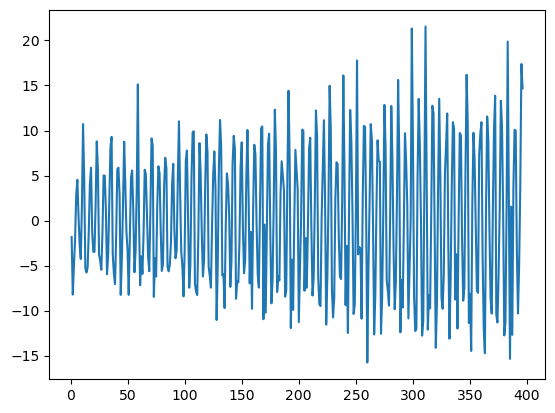

In [11]:
plt.plot(df_diff1)
plt.show()

In [12]:
#AFTER APPLYING DIFFERWENCIG THE TREND HAS GONE BUT THESEASONALITY IS PRESENT,SO IF THE DATA HAS SEASONALITY THEN WE HAVE TO DO THE DIFERENCING
#AS PER YEAR(WHICH IS 12 MOTNHS I.E SHIFT(12))
#in this above plot ,the trend component removed 
#but stil seasonality means stil the TS data is non-stationary .
#we are removing seasonality component , then we need perform diffrencing
#basis of seasonality . here we have dataset , season=12 month means 
#1 season=12 month 
#perform Seasonal difference means subtract original time series data from
#lag12 means shift(12)

In [13]:
#it is not stationary,so we have to apply second order diferencing using shift(12) which is second method.
df_seasonal_diff=df['IPG2211A2N']-df['IPG2211A2N'].shift(12)
df_seasonal_diff.head(15)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    0.8005
13   -2.6851
14   -0.2281
Name: IPG2211A2N, dtype: float64

In [14]:
df_seasonal_diff=df_seasonal_diff.dropna()
df_seasonal_diff

12      0.8005
13     -2.6851
14     -0.2281
15     -0.4385
16      0.4986
        ...   
392    -4.1483
393     2.1270
394     4.4459
395     1.9518
396    14.5543
Name: IPG2211A2N, Length: 385, dtype: float64

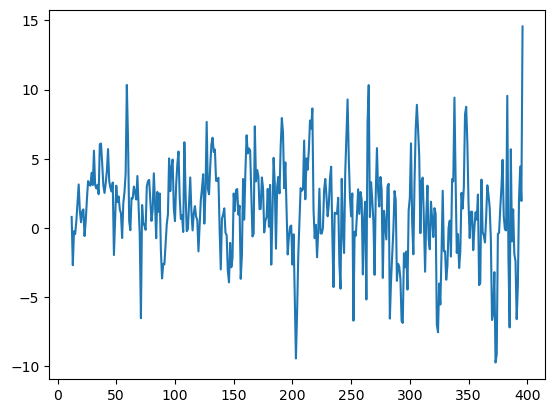

In [15]:
plt.plot(df_seasonal_diff)
plt.show()

In [16]:
#since the series has not become because of some random error or some trend present in a data after differecingso we are againgoing to apply 1st order differening o avoid trend
'''
#in above plot , the seasonality component removed . There are some up & downs 
#these are not seasonality , but these are just random error or white noise .
#here Seasonality has been removed but not satisfied still show some trend
#apply first order differencing  , means subtract seasonal_difference from
#lag1 of itself Time series seasonal_difference
'''

'\n#in above plot , the seasonality component removed . There are some up & downs \n#these are not seasonality , but these are just random error or white noise .\n#here Seasonality has been removed but not satisfied still show some trend\n#apply first order differencing  , means subtract seasonal_difference from\n#lag1 of itself Time series seasonal_difference\n'

In [17]:
df_diff_1=df_seasonal_diff-df_seasonal_diff.shift(1)
df_diff_1.head()

12       NaN
13   -3.4856
14    2.4570
15   -0.2104
16    0.9371
Name: IPG2211A2N, dtype: float64

In [18]:
df_diff_1=df_diff_1.dropna()
df_diff_1

13     -3.4856
14      2.4570
15     -0.2104
16      0.9371
17      1.3115
        ...   
392     2.4364
393     6.2753
394     2.3189
395    -2.4941
396    12.6025
Name: IPG2211A2N, Length: 384, dtype: float64

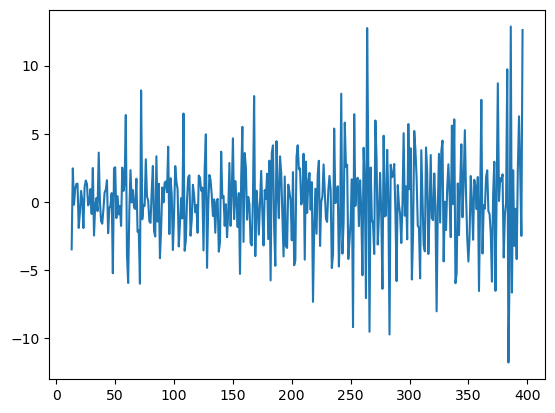

In [19]:
plt.plot(df_diff_1)
plt.show()

In [ ]:
#in the above plot,the series has become stationary because here the mean is zero.

In [ ]:
#Now its look much better and much stable we can see there is a constant
#mean means here mean=0 . Here the trend has been removed and seasonality 
#has been removed .
#There are some white noise means random error show. 
#but this look much better.
#This is the concept of differencing which is the middle of ARIMA that is
#Integration

In [20]:
#ARIMA model is used in this time series data.
#AR(P)I(D)MA(Q)
#FIND THEVALUE OF P WITH THE HELPOF PACF
#FIND THEVALUE OF Q WITH THEHELP OF ACF
#AND D=1 BECAUSE ONLY FIRST ORDER DIFFERENCING IS DONE THIS DATASET.

In [21]:
#plot acf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

C:\Users\Itvedant CR4-1\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


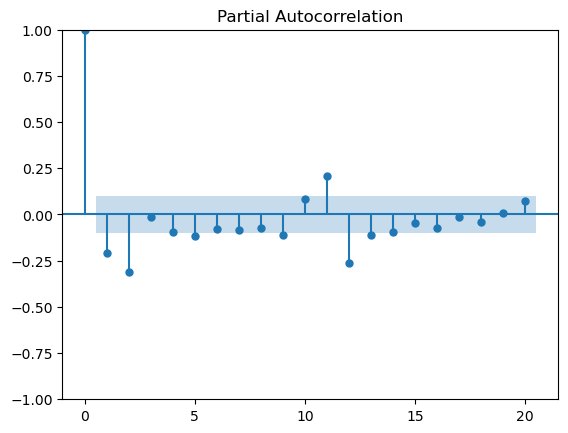

In [22]:
#draw pacf plot on stationary time series df_diff_1
plot_pacf(df_diff_1,lags=20)
plt.show()

In [23]:
#from above plot we can conclude p=2 becaue we have to count the line whcihc is outside the significant area(blue shaded) but inside chale gaya toh woh line count nahi hiag and wahi stop kar dena hai 


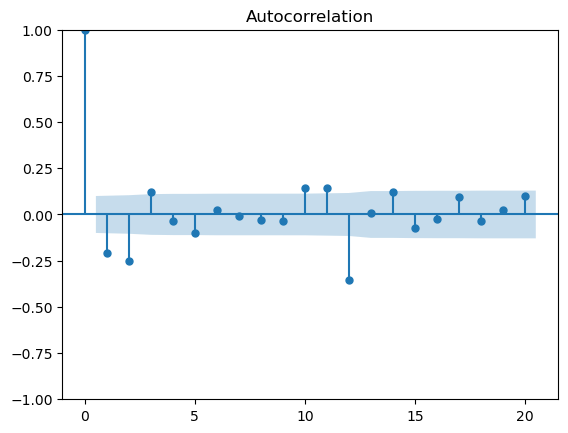

In [24]:
#now we have to find out MA(q) andit is decided by ACF
plot_acf(df_diff_1,lags=20)
plt.show()

In [25]:
#here the MA(q=3) because only 3 line is outside the significant area andwe are goint to stop the couting of q because after that ine is inside the significant area.

In [26]:
#now forecasting the data using ARIMA model
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [27]:
#Note : Arima model donot work on those Time series data whose presence Trend
#and seasonality both .
#Arima model only work of those TS data whose presence only Trend 
#IF trend along with seasonality  in time series data then use SARIMAX

In [28]:
#Since the data is having seasonality ,so we are going to apply SARIMAX.
#SARIMAX or seasonality arimax
#special version of arima
#call inbuilt call SARIMAX
import statsmodels.api as sm
#.tsa.statespace import SARIMAX

In [29]:
#create object of class sarimax and passimng the arguments
#                                             p,d,q                        p,d,q,seasonalshift=12 months
model=sm.tsa.statespace.SARIMAX(df['IPG2211A2N'],order=(2,1,3),seasonal_order=(2,1,3,12),trend='c')
#trend=t or c 
#trend can be either linear or exponential
#if trend is linear then pass 't' in trend parameter otherwise pass 'c' in 
#trend parameter

In [30]:
#now train the model with sarimax model
#first it will do 12 differencing and after that again 1order differencing whcih we have done manually in above arima mdoel
model=model.fit()

In [31]:
df.shape

(397, 2)

In [43]:
#fething the record which we have to test
397*70/100


277.9

In [33]:
#now test the model using predict method of SARIMAX model
y_pred=model.predict(start=279,end=396)#test with last 119  records i.e 30% data and trained with all the 100% data


In [34]:
y_pred

279     91.429714
280     92.027296
281    100.283548
282    110.361448
283    112.296261
          ...    
392     98.978921
393     90.374293
394     97.188627
395    111.794967
396    120.734632
Name: predicted_mean, Length: 118, dtype: float64

In [35]:
df['forecast']=y_pred
df.tail(20)

,DATE,IPG2211A2N,forecast
377,2016-06-01,104.0375,102.194925
378,2016-07-01,114.5397,113.603115
379,2016-08-01,115.5159,112.161349
380,2016-09-01,102.7637,102.442197
381,2016-10-01,91.4867,92.828543
382,2016-11-01,92.8900,94.766503
383,2016-12-01,112.7694,107.965908
384,2017-01-01,114.8505,120.897214
385,2017-02-01,99.4901,106.058878
386,2017-03-01,101.0396,94.399876


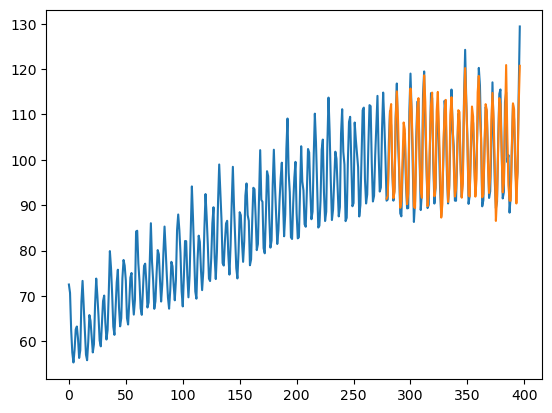

In [36]:
#plot the actual and predicted value
plt.plot(df[['IPG2211A2N','forecast']])
plt.show()

In [37]:
#from above plot,we can conclued that the actual and predicted value are almost same with the help of sarimax model.


In [38]:
#now checking the error by differenicng y_pred=y_test
y_test=df['IPG2211A2N']
y_test=y_test[279:397,]
y_test

279     90.9944
280     91.2348
281    103.9581
282    110.7631
283    107.5665
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 118, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
mse=mean_squared_error(y_test,y_pred)
mse

8.005531772630496

In [41]:
score=r2_score(y_test,y_pred)
score

0.9152475163736467